In [17]:
import pandas as pd
from sqlalchemy import create_engine
import mysql.connector

# Informations de connexion
host = "localhost"
user = "root"
password = ""
database = "Population"

# Chemins des fichiers CSV
csv_files = {
    "populationMetaDataSerieHistorique2020": r"C:/Users\willi/OneDrive/Documents/SQLBdd/populationMetaDataSerieHistorique2020.csv",
    "populationDepartementsFrance": r"C:/Users/willi/OneDrive/Documents/SQLBdd/populationDepartementsFrance.csv",
    "populationSerieHistorique2020": r"C:/Users/willi/OneDrive/Documents/SQLBdd/populationSerieHistorique2020.csv"
}

def create_database_if_not_exists():
    """Crée la base de données si elle n'existe pas."""
    try:
        conn = mysql.connector.connect(host=host, user=user, password=password)
        cursor = conn.cursor()
        cursor.execute(f"CREATE DATABASE IF NOT EXISTS {database}")
        print(f"La base de données '{database}' est prête.")
        cursor.close()
        conn.close()
    except Exception as e:
        print(f"Erreur lors de la création de la base de données : {e}")

def csv_to_sql_table(csv_path, table_name):
    """Importe un fichier CSV dans une table SQL."""
    try:
        # Charger le fichier CSV dans un DataFrame
        df = pd.read_csv(csv_path)
        print(f"Chargement du fichier : {csv_path} dans un DataFrame.")
        
        # Raccourcir les noms des colonnes
        max_column_length = 64
        df.columns = [col[:max_column_length] for col in df.columns]
        
        # Convertir le nom de la table en minuscules
        table_name = table_name.lower()
        
        # Création de l'engine pour se connecter à la base de données
        engine = create_engine(f'mysql+mysqlconnector://{user}:{password}@{host}/{database}')
        
        # Exporter le DataFrame vers la base de données
        df.to_sql(table_name, engine, if_exists='replace', index=False)
        print(f"Table '{table_name}' créée avec succès dans la base '{database}'.")
    except Exception as e:
        print(f"Erreur lors de l'importation de {csv_path} : {e}")

# Étape 1 : Créer la base de données si elle n'existe pas
create_database_if_not_exists()

# Étape 2 : Charger chaque CSV en table SQL
for table_name, csv_path in csv_files.items():
    csv_to_sql_table(csv_path, table_name)

La base de données 'Population' est prête.
Chargement du fichier : C:/Users\willi/OneDrive/Documents/SQLBdd/populationMetaDataSerieHistorique2020.csv dans un DataFrame.
Table 'populationmetadataseriehistorique2020' créée avec succès dans la base 'Population'.
Chargement du fichier : C:/Users/willi/OneDrive/Documents/SQLBdd/populationDepartementsFrance.csv dans un DataFrame.
Table 'populationdepartementsfrance' créée avec succès dans la base 'Population'.
Chargement du fichier : C:/Users/willi/OneDrive/Documents/SQLBdd/populationSerieHistorique2020.csv dans un DataFrame.
Table 'populationseriehistorique2020' créée avec succès dans la base 'Population'.


In [1]:
import pandas as pd
from sqlalchemy import create_engine
import mysql.connector

# Informations de connexion
host = "localhost"
user = "root"
password = ""
database = "Population"

# Chemins des fichiers CSV
csv_files = {
    "populationMetaDataSerieHistorique2020": r"C:/Users/willi/OneDrive/Documents/SQLBdd/populationMetaDataSerieHistorique2020.csv",
    "populationSerieHistorique2020": r"C:/Users/willi/OneDrive/Documents/SQLBdd/populationSerieHistorique2020.csv",
}

def create_database_if_not_exists():
    """Crée la base de données si elle n'existe pas."""
    try:
        conn = mysql.connector.connect(host=host, user=user, password=password)
        cursor = conn.cursor()
        cursor.execute(f"CREATE DATABASE IF NOT EXISTS {database}")
        print(f"La base de données '{database}' est prête.")
        cursor.close()
        conn.close()
    except Exception as e:
        print(f"Erreur lors de la création de la base de données : {e}")

def fix_and_load_csv(csv_path, table_name):
    """Corrige un fichier CSV s'il est mal formé et l'importe dans une table SQL."""
    try:
        # Essayer de lire le fichier CSV avec un délimiteur ';'
        try:
            df = pd.read_csv(csv_path, delimiter=';', encoding='utf-8')
            print(f"Fichier chargé correctement avec ';' : {csv_path}")
        except Exception as e:
            print(f"Erreur lors de la lecture avec ';' pour {csv_path}: {e}")
            # Si ';' échoue, essayer avec une virgule ','
            df = pd.read_csv(csv_path, delimiter=',', encoding='utf-8')
            print(f"Fichier chargé correctement avec ',' : {csv_path}")

        # Vérifiez si le DataFrame est bien formé
        if df.shape[1] <= 1:
            raise ValueError(f"Le fichier {csv_path} semble mal formé. Vérifiez les délimiteurs ou la structure.")

        # Raccourcir les noms des colonnes si nécessaire
        max_column_length = 64
        df.columns = [col[:max_column_length] for col in df.columns]

        # Réenregistrer le fichier corrigé (facultatif)
        corrected_path = csv_path.replace(".csv", "_corrected.csv")
        df.to_csv(corrected_path, index=False, sep=';', encoding='utf-8')
        print(f"Fichier corrigé enregistré sous : {corrected_path}")

        # Importer dans la base MySQL
        table_name = table_name.lower()
        engine = create_engine(f'mysql+mysqlconnector://{user}:{password}@{host}/{database}')
        df.to_sql(table_name, engine, if_exists='replace', index=False)
        print(f"Table '{table_name}' créée avec succès dans la base '{database}'.")
    except Exception as e:
        print(f"Erreur lors du traitement de {csv_path} : {e}")

# Étape 1 : Créer la base de données si elle n'existe pas
create_database_if_not_exists()

# Étape 2 : Charger et corriger chaque CSV
for table_name, csv_path in csv_files.items():
    fix_and_load_csv(csv_path, table_name)

C:\Users\willi\AppData\Local\Temp\ipykernel_1612\2668571129.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


La base de données 'Population' est prête.
Fichier chargé correctement avec ';' : C:/Users/willi/OneDrive/Documents/SQLBdd/populationMetaDataSerieHistorique2020.csv
Fichier corrigé enregistré sous : C:/Users/willi/OneDrive/Documents/SQLBdd/populationMetaDataSerieHistorique2020_corrected.csv
Table 'populationmetadataseriehistorique2020' créée avec succès dans la base 'Population'.
Fichier chargé correctement avec ';' : C:/Users/willi/OneDrive/Documents/SQLBdd/populationSerieHistorique2020.csv


C:\Users\willi\AppData\Local\Temp\ipykernel_1612\2668571129.py:34: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path, delimiter=';', encoding='utf-8')


Fichier corrigé enregistré sous : C:/Users/willi/OneDrive/Documents/SQLBdd/populationSerieHistorique2020_corrected.csv
Table 'populationseriehistorique2020' créée avec succès dans la base 'Population'.


C:\Users\willi\AppData\Local\Temp\ipykernel_16160\1855535511.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


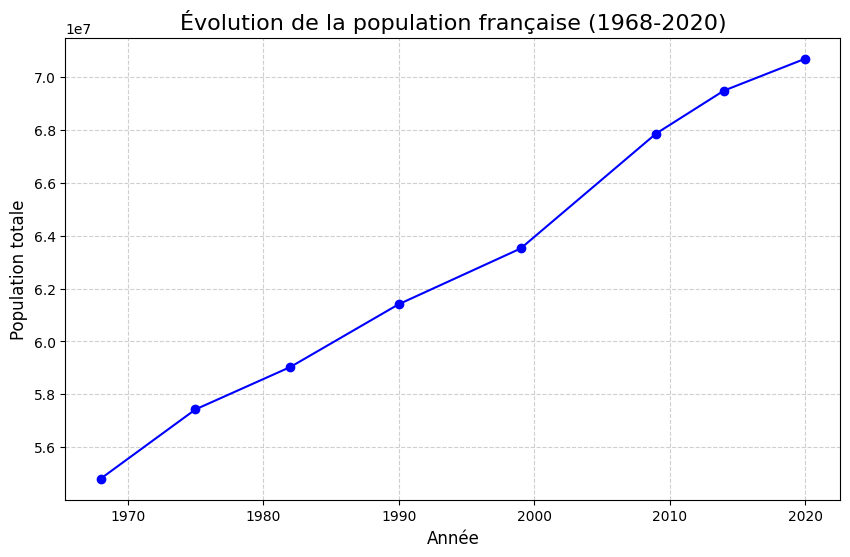

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine


engine = create_engine('mysql+mysqlconnector://root@localhost:3306/Population')

# Requête SQL pour extraire les données des différentes années
query = """
SELECT 
    SUM(D68_POP) AS pop_1968,
    SUM(D75_POP) AS pop_1975,
    SUM(D82_POP) AS pop_1982,
    SUM(D90_POP) AS pop_1990,
    SUM(D99_POP) AS pop_1999,
    SUM(P09_POP) AS pop_2009,
    SUM(P14_POP) AS pop_2014,
    SUM(P20_POP) AS pop_2020
FROM Population
"""
# Exécuter la requête
df = pd.read_sql(query, engine)

# Transformer les données pour créer un DataFrame avec années et populations
populations = {
    'Année': [1968, 1975, 1982, 1990, 1999, 2009, 2014, 2020],
    'Population': [
        df['pop_1968'][0],
        df['pop_1975'][0],
        df['pop_1982'][0],
        df['pop_1990'][0],
        df['pop_1999'][0],
        df['pop_2009'][0],
        df['pop_2014'][0],
        df['pop_2020'][0],
    ],
}

pop_df = pd.DataFrame(populations)

# Créer le graphique
plt.figure(figsize=(10, 6))
plt.plot(pop_df['Année'], pop_df['Population'], marker='o', linestyle='-', color='b')

# Ajouter des titres et des labels
plt.title("Évolution de la population française (1968-2020)", fontsize=16)
plt.xlabel("Année", fontsize=12)
plt.ylabel("Population totale", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Définir le chemin de sauvegarde du graphique
chemin = 'C:/Users/willi/OneDrive/Documents/SQLBdd/evolution_population_francaise_1968_2020.jpeg'

# Enregistrer le graphique au format JPEG
plt.savefig(chemin, format='jpeg')

# Afficher le graphique
plt.show()

                  nom  croissance
0         Montpellier      137186
1            Toulouse      127207
2         Saint-Denis       67557
3               Cergy       64895
4          Saint-Paul       61172
5              Nantes       60488
6  Évry-Courcouronnes       58814
7     Aix-en-Provence       57556
8              Annecy       53500
9           Le Tampon       49400


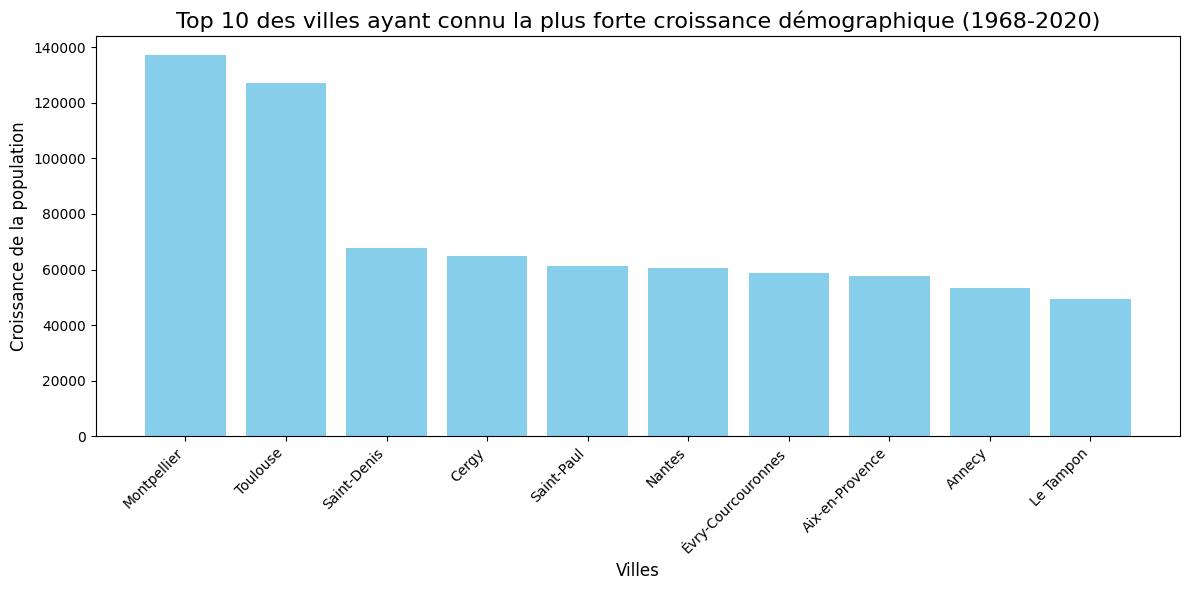

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine


engine = create_engine('mysql+mysqlconnector://root@localhost:3306/Population')

# Requête SQL pour les 10 villes avec la plus forte croissance
query = """
SELECT 
    c.LIB_MOD AS nom, 
    (p.P20_POP - p.D68_POP) AS croissance
FROM Commune c
JOIN Population p ON c.CODGEO = p.CODGEO
ORDER BY croissance DESC
LIMIT 10;
"""

# Exécuter la requête et charger les données dans pandas
df = pd.read_sql(query, engine)

# Vérification des données
print(df)

# Création du graphique
plt.figure(figsize=(12, 6))
plt.bar(df['nom'], df['croissance'], color='skyblue')

# Ajouter les labels et un titre
plt.title("Top 10 des villes ayant connu la plus forte croissance démographique (1968-2020)", fontsize=16)
plt.xlabel("Villes", fontsize=12)
plt.ylabel("Croissance de la population", fontsize=12)
plt.xticks(rotation=45, ha='right')

# Définir le chemin de sauvegarde du graphique
chemin = 'C:/Users/willi/OneDrive/Documents/SQLBdd/top_10_villes_croissance.jpeg'


plt.savefig(chemin, format='jpeg')

plt.tight_layout()
plt.show()


C:\Users\willi\AppData\Local\Temp\ipykernel_16160\3435180033.py:39: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  total_population_df = pd.read_sql(query_total, con=db_connection)
C:\Users\willi\AppData\Local\Temp\ipykernel_16160\3435180033.py:40: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  arrondissements_population_df = pd.read_sql(query_par_arrondissement, con=db_connection)


Population totale de Paris (sans doublons, excluant Parisot et Paris-L'Hôpital) : 2145906.0


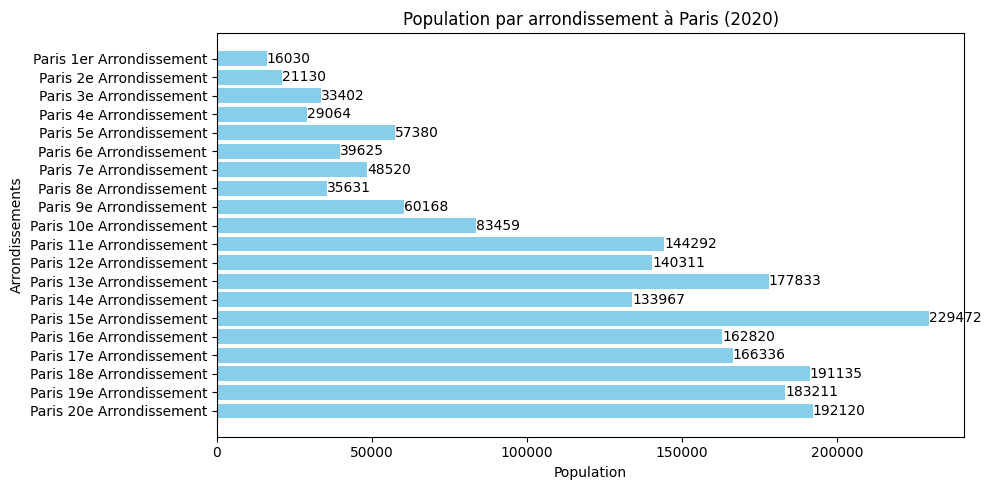

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector
import os

try:
    # Connexion à la base de données
    db_connection = mysql.connector.connect(
        host="localhost",
        user="root",
        password="",  
        database="Population"
    )
    
    # Requête pour la population totale de Paris (arrondissements uniquement, excluant Parisot et Paris-L'Hôpital)
    query_total = """
    SELECT 
        SUM(p.P20_POP) AS Population_totale_Paris
    FROM Commune c
    JOIN Population p ON c.CODGEO = p.CODGEO
    WHERE c.LIB_MOD LIKE 'Paris%' 
      AND c.LIB_MOD NOT IN ('Parisot', 'Paris-L''Hôpital') 
      AND c.LIB_MOD != 'Paris';
    """
    
    # Requête pour la population par arrondissement
    query_par_arrondissement = """
    SELECT 
        c.LIB_MOD AS Arrondissement, 
        p.P20_POP AS Population
    FROM Commune c
    JOIN Population p ON c.CODGEO = p.CODGEO
    WHERE c.LIB_MOD LIKE 'Paris%' 
      AND c.LIB_MOD NOT IN ('Parisot', 'Paris-L''Hôpital') 
      AND c.LIB_MOD != 'Paris';
    """
    
    # Exécuter les requêtes
    total_population_df = pd.read_sql(query_total, con=db_connection)
    arrondissements_population_df = pd.read_sql(query_par_arrondissement, con=db_connection)
    
    # Validation des données
    if total_population_df.empty:
        print("Aucune donnée trouvée pour la population totale de Paris.")
        exit()

    if arrondissements_population_df.empty:
        print("Aucune donnée trouvée pour les populations par arrondissement.")
        exit()

    # Affichage de la population totale de Paris
    total_population = total_population_df.loc[0, 'Population_totale_Paris']
    print(f"Population totale de Paris (sans doublons, excluant Parisot et Paris-L'Hôpital) : {total_population}")

    # Visualisation de la population par arrondissement
    plt.figure(figsize=(10, 5))
    plt.barh(arrondissements_population_df['Arrondissement'], arrondissements_population_df['Population'], color='skyblue')
    plt.xlabel('Population')
    plt.ylabel('Arrondissements')
    plt.title('Population par arrondissement à Paris (2020)')
    plt.gca().invert_yaxis()  # Inverser l'ordre pour afficher les arrondissements les plus peuplés en haut
    
    # Ajout des valeurs sur les barres
    for index, value in enumerate(arrondissements_population_df['Population']):
        plt.text(value, index, str(value), va='center')

    # Chemin de sauvegarde
    chemin = 'C:/Users/willi/OneDrive/Documents/SQLBdd/population_paris_arrondissements.jpeg'
    os.makedirs(os.path.dirname(chemin), exist_ok=True)
    
    # Affichage et sauvegarde du graphique
    plt.tight_layout()
    plt.savefig(chemin, format='jpeg')
    plt.show()

except mysql.connector.Error as err:
    print(f"Erreur de connexion ou d'exécution SQL : {err}")

finally:
    if db_connection.is_connected():
        db_connection.close()

                nom  croissance
0    Seine-et-Marne    824296.0
1     Haute-Garonne    689451.0
2           Essonne    634344.0
3  Bouches-du-Rhône    633468.0
4           Gironde    621597.0
5           Hérault    597576.0
6          Yvelines    595341.0
7  Loire-Atlantique    583089.0
8        Val-d'Oise    558535.0
9             Rhône    551482.0


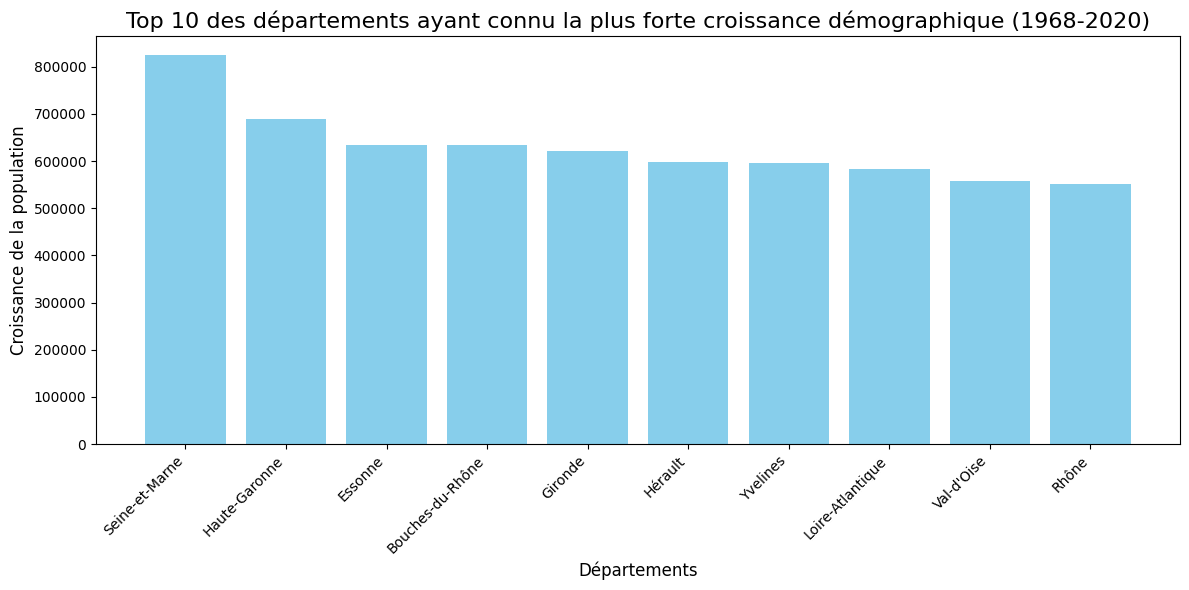

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

# Connexion MySQL
engine = create_engine('mysql+mysqlconnector://root@localhost:3306/Population')

# Requête SQL pour les 10 départements ayant connu la plus forte croissance
query = """
SELECT 
    d.NomDepart AS nom, 
    (SUM(p.P20_POP) - SUM(p.D68_POP)) AS croissance
FROM Departement d
JOIN Population p ON d.CodeDepart = LEFT(p.CODGEO, 2)
GROUP BY d.NomDepart
ORDER BY croissance DESC
LIMIT 10;
"""

# Exécuter la requête et charger les données dans pandas
df = pd.read_sql(query, engine)

# Vérification des données
print(df)

# Création du graphique
plt.figure(figsize=(12, 6))
plt.bar(df['nom'], df['croissance'], color='skyblue')

# Ajouter les labels et un titre
plt.title("Top 10 des départements ayant connu la plus forte croissance démographique (1968-2020)", fontsize=16)
plt.xlabel("Départements", fontsize=12)
plt.ylabel("Croissance de la population", fontsize=12)
plt.xticks(rotation=45, ha='right')

# Chemin de sauvegarde
chemin = 'C:/Users/willi/OneDrive/Documents/SQLBdd/croissance_departements.jpeg'


plt.tight_layout()
plt.savefig(chemin, format='jpeg')


plt.tight_layout()
plt.show()

                          nom  croissance
0               Île-de-France   2593002.0
1                   Occitanie   2144288.0
2        Auvergne-Rhône-Alpes   2014229.0
3          Nouvelle-Aquitaine   1366812.0
4  Provence-Alpes-Côte d'Azur   1348082.0
5            Pays de la Loire   1272309.0
6                    Bretagne    910635.0
7             Hauts-de-France    850263.0
8                   Normandie    759401.0
9                   Grand Est    721415.0


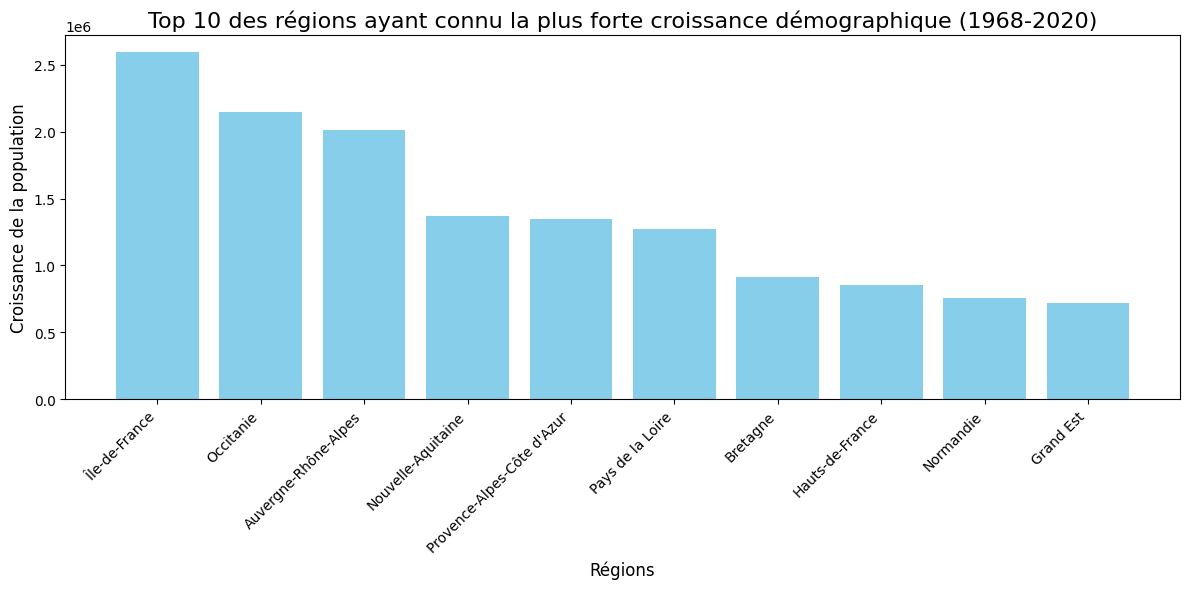

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

# Connexion MySQL
engine = create_engine('mysql+mysqlconnector://root@localhost:3306/Population')

# Requête SQL pour les 10 régions ayant connu la plus forte croissance
query = """
SELECT 
    r.nomRegion AS nom, 
    (SUM(p.P20_POP) - SUM(p.D68_POP)) AS croissance
FROM Region r
JOIN Departement d ON r.CodeRegion = d.CodeRegion
JOIN Population p ON d.CodeDepart = LEFT(p.CODGEO, 2)
GROUP BY r.nomRegion
ORDER BY croissance DESC
LIMIT 10;
"""

# Exécuter la requête et charger les données dans pandas
df = pd.read_sql(query, engine)

# Vérification des données
print(df)

# Création du graphique
plt.figure(figsize=(12, 6))
plt.bar(df['nom'], df['croissance'], color='skyblue')

# Ajouter les labels et un titre
plt.title("Top 10 des régions ayant connu la plus forte croissance démographique (1968-2020)", fontsize=16)
plt.xlabel("Régions", fontsize=12)
plt.ylabel("Croissance de la population", fontsize=12)
plt.xticks(rotation=45, ha='right')

# Chemin de sauvegarde
chemin = 'C:/Users/willi/OneDrive/Documents/SQLBdd/croissance_regions.jpeg'


plt.tight_layout()
plt.savefig(chemin, format='jpeg')


plt.tight_layout()
plt.show()


           nom  total_naissances  total_deces
0        Paris         1645891.0    1020509.0
1    Marseille          607953.0     442758.0
2         Lyon          359039.0     212134.0
3     Toulouse          296154.0     152034.0
4  Saint-Denis          234368.0      69174.0
5       Nantes          216465.0     110131.0
6         Nice          214016.0     222301.0
7   Strasbourg          212175.0     112187.0
8        Lille          197342.0     103126.0
9  Montpellier          169660.0      83825.0


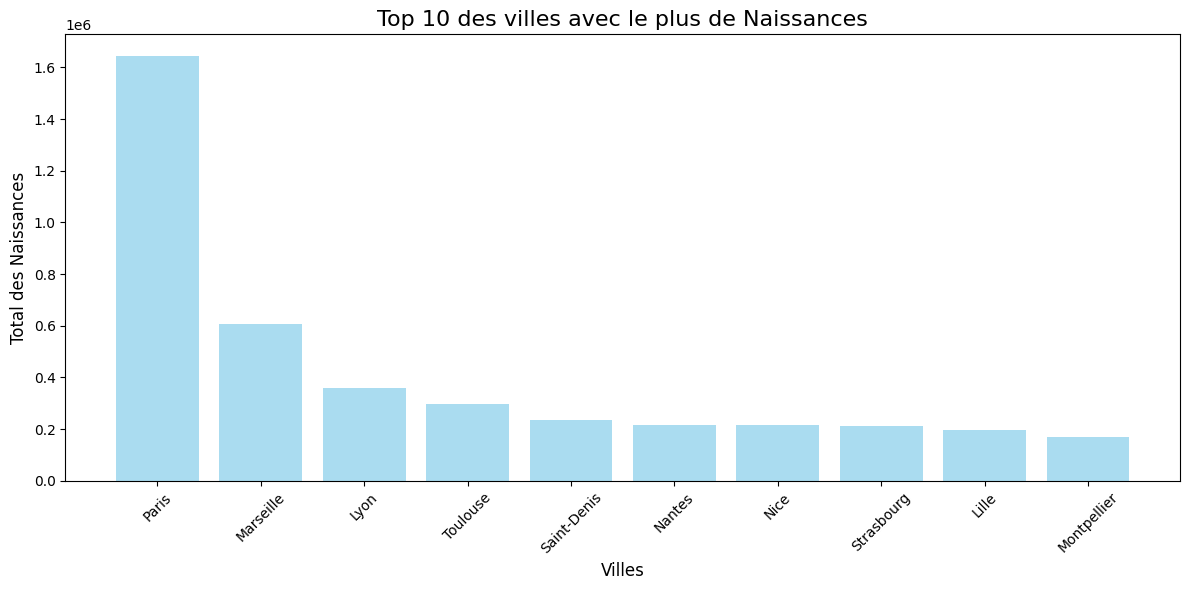

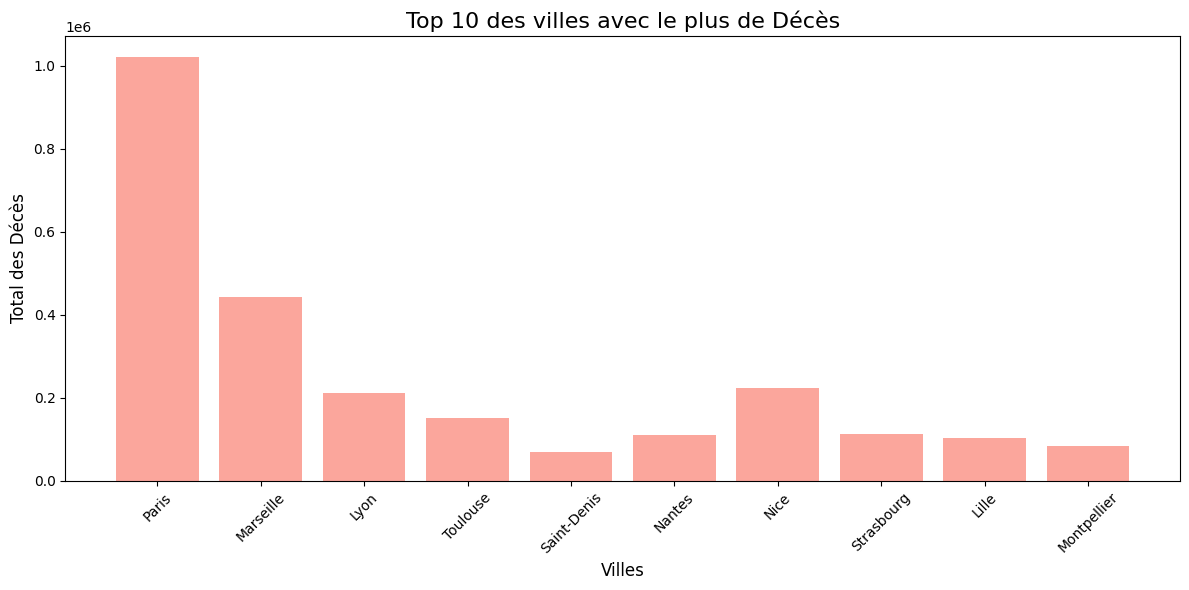

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

# Connexion à MySQL
engine = create_engine('mysql+mysqlconnector://root@localhost:3306/Population')

# Requête SQL pour obtenir les 10 villes avec le plus de naissances et de décès
query = """
SELECT 
    c.LIB_MOD AS nom,
    SUM(p.NAIS1420 + p.NAIS0914 + p.NAIS9909 + p.NAIS9099 + p.NAIS8290 + p.NAIS7582 + p.NAIS6875) AS total_naissances,
    SUM(p.DECE1420 + p.DECE0914 + p.DECE9909 + p.DECE9099 + p.DECE8290 + p.DECE7582 + p.DECE6875) AS total_deces
FROM Commune c
JOIN PopulationSerieHistorique2020 p ON c.CODGEO = p.CODGEO
GROUP BY c.LIB_MOD
ORDER BY total_naissances DESC, total_deces DESC
LIMIT 10;
"""

# Exécuter la requête et charger les données dans pandas
df = pd.read_sql(query, engine)

# Vérification des données
print(df)

# 1er graphique pour les Naissances
plt.figure(figsize=(12, 6))
plt.bar(df['nom'], df['total_naissances'], color='skyblue', alpha=0.7)
plt.xlabel("Villes", fontsize=12)
plt.ylabel("Total des Naissances", fontsize=12)
plt.title("Top 10 des villes avec le plus de Naissances", fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()

# Sauvegarder le graphique des naissances
chemin_naissances = "C:/Users/willi/OneDrive/Documents/SQLBdd/naissances_top10.jpeg"
plt.savefig(chemin_naissances, format='jpeg')
plt.show()

# 2ème graphique pour les Décès
plt.figure(figsize=(12, 6))
plt.bar(df['nom'], df['total_deces'], color='salmon', alpha=0.7)
plt.xlabel("Villes", fontsize=12)
plt.ylabel("Total des Décès", fontsize=12)
plt.title("Top 10 des villes avec le plus de Décès", fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()

# Sauvegarder le graphique des décès
chemin_deces = "C:/Users/willi/OneDrive/Documents/SQLBdd/deces_top10.jpeg"
plt.savefig(chemin_deces, format='jpeg')
plt.show()

C:\Users\willi\AppData\Local\Temp\ipykernel_17412\3982519577.py:36: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  naissances_df = pd.read_sql(query_naissances_departement, con=db_connection)
C:\Users\willi\AppData\Local\Temp\ipykernel_17412\3982519577.py:37: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  deces_df = pd.read_sql(query_deces_departement, con=db_connection)


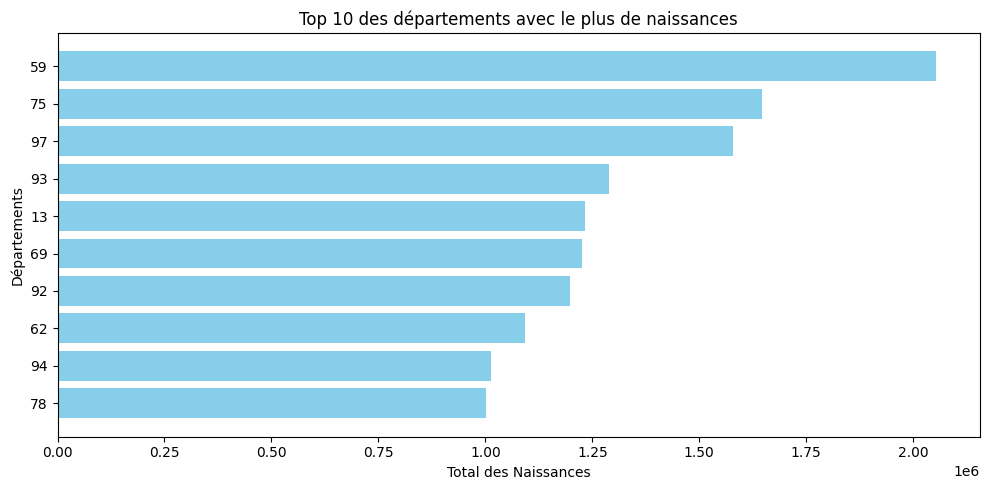

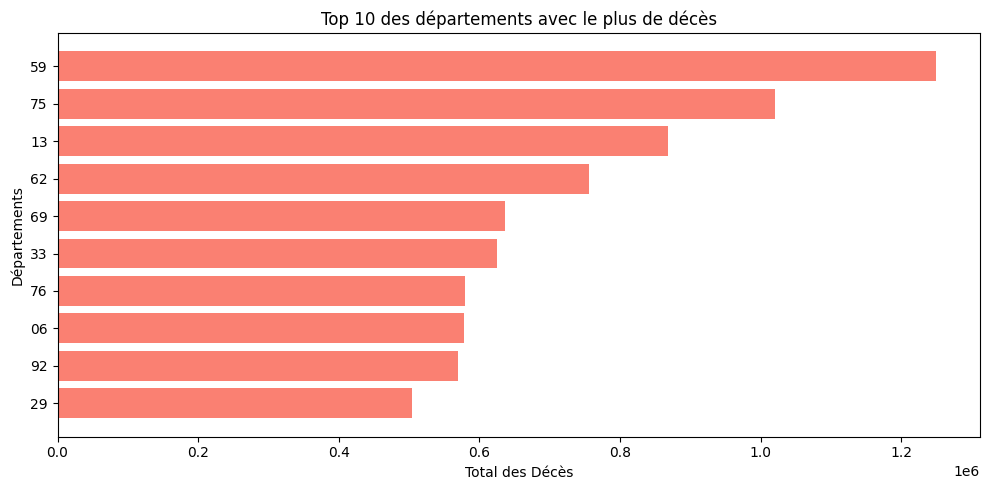

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector

# Connexion à la base de données
db_connection = mysql.connector.connect(
    host="localhost",
    user="root",
    password="",  # Mettez votre mot de passe si nécessaire
    database="Population"
)

# Requête pour les 10 départements avec le plus de naissances
query_naissances_departement = """
SELECT c.CodeDepart AS Departement, 
       SUM(n.NAIS1420 + n.NAIS0914 + n.NAIS9909 + n.NAIS9099 + n.NAIS8290 + n.NAIS7582 + n.NAIS6875) AS Total_Naissances
FROM Naissance n
JOIN Commune c ON n.CODGEO = c.CODGEO
GROUP BY c.CodeDepart
ORDER BY Total_Naissances DESC
LIMIT 10;
"""

# Requête pour les 10 départements avec le plus de décès
query_deces_departement = """
SELECT c.CodeDepart AS Departement, 
       SUM(d.DECE1420 + d.DECE0914 + d.DECE9909 + d.DECE9099 + d.DECE8290 + d.DECE7582 + d.DECE6875) AS Total_Deces
FROM Deces d
JOIN Commune c ON d.CODGEO = c.CODGEO
GROUP BY c.CodeDepart
ORDER BY Total_Deces DESC
LIMIT 10;
"""

# Exécution des requêtes
naissances_df = pd.read_sql(query_naissances_departement, con=db_connection)
deces_df = pd.read_sql(query_deces_departement, con=db_connection)

# Répertoire pour sauvegarder les graphiques
output_dir = "C:/Users/willi/OneDrive/Documents/SQLBdd/"

# Création du graphe pour les naissances par département
plt.figure(figsize=(10, 5))
plt.barh(naissances_df['Departement'], naissances_df['Total_Naissances'], color='skyblue')
plt.xlabel('Total des Naissances')
plt.ylabel('Départements')
plt.title('Top 10 des départements avec le plus de naissances')
plt.gca().invert_yaxis()  # Inverser l'ordre pour avoir le plus grand en haut
plt.tight_layout()

# Sauvegarde en JPEG
chemin_naissances = output_dir + "naissances_departements.jpeg"
plt.savefig(chemin_naissances, format='jpeg')
plt.show()

# Création du graphe pour les décès par département
plt.figure(figsize=(10, 5))
plt.barh(deces_df['Departement'], deces_df['Total_Deces'], color='salmon')
plt.xlabel('Total des Décès')
plt.ylabel('Départements')
plt.title('Top 10 des départements avec le plus de décès')
plt.gca().invert_yaxis()  # Inverser l'ordre pour avoir le plus grand en haut
plt.tight_layout()

# Sauvegarde en JPEG
chemin_deces = output_dir + "deces_departements.jpeg"
plt.savefig(chemin_deces, format='jpeg')
plt.show()

# Fermer la connexion à la base de données
db_connection.close()

Connexion réussie à la base de données.


C:\Users\willi\AppData\Local\Temp\ipykernel_17412\3878604066.py:31: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_grande_densite = pd.read_sql(query_grande_densite, conn)
C:\Users\willi\AppData\Local\Temp\ipykernel_17412\3878604066.py:46: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_petite_densite = pd.read_sql(query_petite_densite, conn)


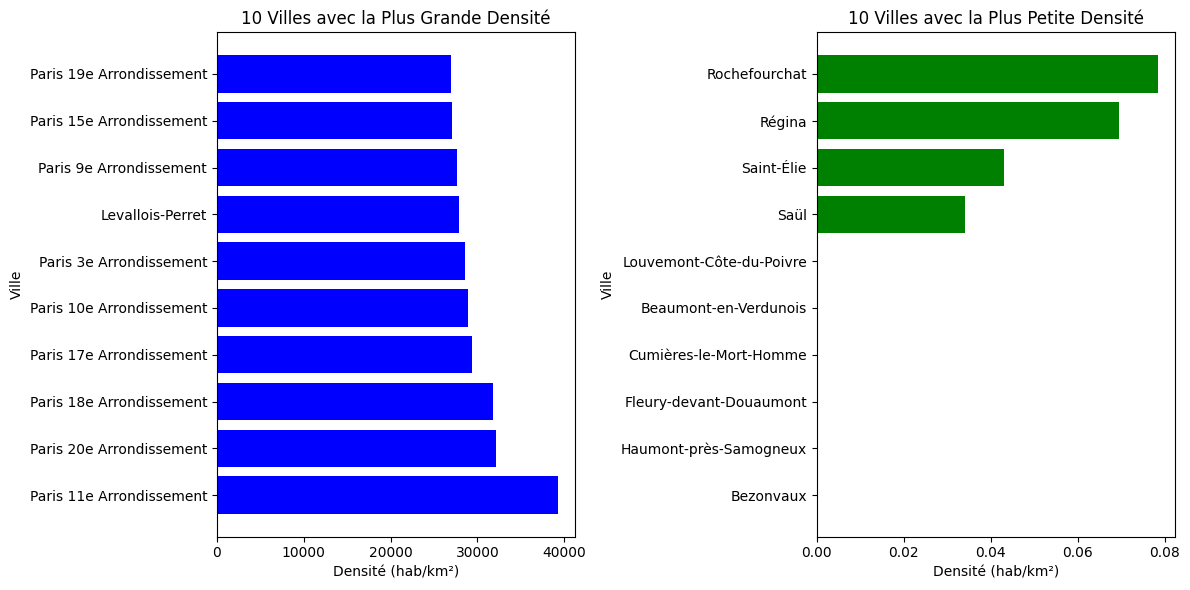

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import mysql.connector

# Connexion à la base de données MySQL
try:
    conn = mysql.connector.connect(
        host="localhost",
        user="root",
        password="",  
        database="Population"
    )
    print("Connexion réussie à la base de données.")
except mysql.connector.Error as err:
    print(f"Erreur de connexion : {err}")
    exit()

# Exécution de la requête pour les 10 villes avec la plus grande densité
query_grande_densite = """
SELECT c.LIB_MOD, 
       (SUM(p.P20_POP) / SUM(p.SUPERF)) AS densite_population
FROM Commune c
JOIN populationseriehistorique2020 p ON c.CODGEO = p.CODGEO
WHERE p.P20_POP IS NOT NULL AND p.SUPERF > 0
GROUP BY c.LIB_MOD
ORDER BY densite_population DESC
LIMIT 10;
"""

# Chargement des résultats dans un DataFrame pandas
df_grande_densite = pd.read_sql(query_grande_densite, conn)

# Exécution de la requête pour les 10 villes avec la plus petite densité
query_petite_densite = """
SELECT c.LIB_MOD, 
       (SUM(p.P20_POP) / SUM(p.SUPERF)) AS densite_population
FROM Commune c
JOIN populationseriehistorique2020 p ON c.CODGEO = p.CODGEO
WHERE p.P20_POP IS NOT NULL AND p.SUPERF > 0
GROUP BY c.LIB_MOD
ORDER BY densite_population ASC
LIMIT 10;
"""

# Chargement des résultats dans un DataFrame pandas
df_petite_densite = pd.read_sql(query_petite_densite, conn)

# Fermeture de la connexion
conn.close()

# Création des graphiques
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Graphe pour les 10 villes avec la plus grande densité
axes[0].barh(df_grande_densite['LIB_MOD'], df_grande_densite['densite_population'], color='blue')
axes[0].set_title('10 Villes avec la Plus Grande Densité')
axes[0].set_xlabel('Densité (hab/km²)')
axes[0].set_ylabel('Ville')

# Graphe pour les 10 villes avec la plus petite densité
axes[1].barh(df_petite_densite['LIB_MOD'], df_petite_densite['densite_population'], color='green')
axes[1].set_title('10 Villes avec la Plus Petite Densité')
axes[1].set_xlabel('Densité (hab/km²)')
axes[1].set_ylabel('Ville')

# Spécification du répertoire pour enregistrer le fichier JPEG
chemin = 'C:/Users/willi/OneDrive/Documents/SQLBdd/graphe_grande_densite_petite_densite.jpeg'
# Enregistrer les graphiques dans le répertoire spécifié
fig.tight_layout()
fig.savefig(chemin, format='jpeg')



# Affichage des graphiques
plt.tight_layout()
plt.show()